# Linear Regression

Linear Regression is a Regression Algorithm, subclass of Supervised Learning Techniques, where the goal is to get a hypothesis function $h(x)$ corresponding to the given dataset of training examples such that $h(x)$ is a line which fits the datapoints.
New datapoints can then be found by finding the target variable corresponding to the given features in accordance with the hypothesis function. 

### How to represent $h(x)$ ?

Let $m$ be the number of training examples in the dataset.
Let $x_j$ be a feature, $n$ be the number of features, and  $y$ the target variable for each training example in the dataset. 

Thus the $i^{th}$ training example can be represented as $(x^i,y^i), \quad 1<i<m$ where $m$ represents the total number of training examples.

Hence we get the hypothesis function $h$:

$$
h_\theta(x_1,x_2,\dots,x_n) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots +  \theta_nx_n \\
 = \sum_{j=0}^n \theta_jx_j, \quad x_0=1
$$

Let $\theta$ be the parameter vector and $x$ be the feature vector as below:

$$
\theta =
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix}
, \quad
x = \begin{pmatrix}
x_0 \\
x_1 \\
\vdots \\
x_n
\end{pmatrix}, \quad \text{where} \quad x_0 = 1
$$
Now it is clear that $h_\theta(x)$ can be represented by the equation:

$$
h_\theta(x)\ = \ \theta^Tx
$$

where $\theta_T$ is the transpose of the parameter vector.


### Goal

The goal in Linear Regression is to find the optimal value for the parameter vector $\theta$ such that: $$h_\theta(x^i)\approx y^i \ \forall \ 1<i<m$$

Formally, we define the parameter vector $\theta$ such that it minimises the **Mean Squared Error** cost function:

$$
    J(\theta)=\frac{1}{2} \ \sum_{i=1}^m \ (h_\theta(x^i)-y^i)^2
$$


### Batch Gradient Descent

1. Start with some value for each $\theta_j$ in parameter vector $\theta$. ( Say $\theta = \vec{0}$ )  
2. Then change $\theta$ repeatedly to reduce $J(\theta)$ as:
    $$
    \theta_j := \theta_j - \alpha(\frac{\partial J(\theta)}{\partial \theta_j})
    $$
    where $\alpha$ is the Learning Rate.  
3. Now repeat the same for all $\theta_j \in [0,n]$  
4. Repeat till $J(\theta)$ converges.


#### Note:

1. It can be derived that:

    $$
        \frac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^m \ (h_\theta(x^i)-y^i)x_j
    $$

    Thus the new Gradient Descent Function becomes:

    $$
    \theta_j := \theta_j - \alpha(\sum_{i=1}^m \ (h_\theta(x^i)-y^i)x_j)
    $$

2. The gradient descent method provides a local minima in terms of the value of the parametric vector. It can be observed that $J(\theta)$ is quadratic in x. Thus it will only have 1 local minima which will be the global minima. Hence gradient descent is guaranteed to work effectively.
3. The learning rate $\alpha$ influences the effectiveness of the algorithm. Too low of a learning rate makes the training very slow, while too high may cause overshot leading to the minima not being found.

### Stochastic Gradient Descent

The disadvantage of Batch Gradient Descent is that for each j, it sums up $(h_\theta(x^i)-y^i)x_j$ for all training examples. For a large dataset, this makes Batch Gradient Descent inefficient in time.  

Stochastic Gradient Descent uses a slightly different approach in order to achieve quicker training.

Here for each training example, all $\theta_j$ in the parameter vector $\theta$ is updated as:
    $$
        \theta_j := \theta_j - \alpha(h_\theta(x^i)-y^i)x_j^i
    $$

Hence the algorithm goes in the direction which minimises $h_\theta(x^i)-y^i$ for each individual training example, leading to $J(\theta)$ going in direction of minima *on average*. This makes Stochastic GD a more efficient but slightly less accurate training algorithm.


## Locally Weighted Regression

Locally Weighted Regression is a non-parametric algorithm (i.e. the number of parameters grows with the size of the dataset). In this algorithm, a weight is assigned to each training example. This weight depends upon the input for that particular test case.

Formally, we minimise the cost function:
    $$
        J(\theta) = \sum_{i=1}^m w^i(h_\theta(x^i)-y^i)^2
    $$
    Here,
    $$
        w^i = exp(\frac{-(x^i-x)^2}{2\tau^2})
    $$
    where $x^i$ is the $i^{th}$ training example, $x$ is the current input and $\tau$ is the bandwidth hyperparameter.

The bandwidth parameter $\tau$, also called the smoothing parameter decides the decay distance of the weights. A high value for $\tau$ smoothes the model, causing consideration of more data points around each test data point. This may lead to underfitting in extreme cases. A low value, on the other hand, captures local patterns as it only considers data points in close proximity to the query, risking overfitting in some cases.

# Implementation of Linear Regression

## Importing Libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Loading Data

In [14]:
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
corr = df.corr()

np.fill_diagonal(corr.values,0)
sorted_corr = corr.unstack().sort_values(ascending=False, key=abs)
print(sorted_corr)

dat = np.hstack((diabetes.data, diabetes.target.reshape(-1,1)))
np.random.shuffle(dat)
x = dat[:,:-1]
y = dat[:,-1]

mean = np.mean(x, axis=0)
std = np.std(x,axis=0)

x[:,0] = (x[:,0]-mean[0])/std[0]
x[:,2:] = (x[:,2:]-mean[2:])/std[2:]

s2  s1    0.896663
s1  s2    0.896663
s4  s3   -0.738493
s3  s4   -0.738493
s2  s4    0.659817
            ...   
    s2    0.000000
s3  s3    0.000000
s4  s4    0.000000
s5  s5    0.000000
s6  s6    0.000000
Length: 100, dtype: float64


## Test-Train Splitting

In [15]:
l_train = 353
l_test = 89

train_x, train_y = x[0:l_train,:], y[0:l_train]
test_x, test_y = x[l_train:,:], y[l_train:]

train_x = np.hstack((np.ones((l_train,1)), train_x))
test_x = np.hstack((np.ones((l_test,1)), test_x))

## Setting Parameters

In [16]:
parameters = x.shape[1]
theta = np.zeros(parameters+1)
threshold = 1e-6
alpha = 0.01

## Training Using Batch Gradient Descent

In [17]:
prevcost = float('inf')
while True:
    hypothesis = train_x @ theta
    
    theta = theta + (alpha/l_train)*(train_x.T @ (train_y-hypothesis))
    currcost = (1/(2*l_train))*np.sum(np.square(train_y-hypothesis))
    
    if abs(currcost-prevcost) <= threshold:
        break

    prevcost = currcost

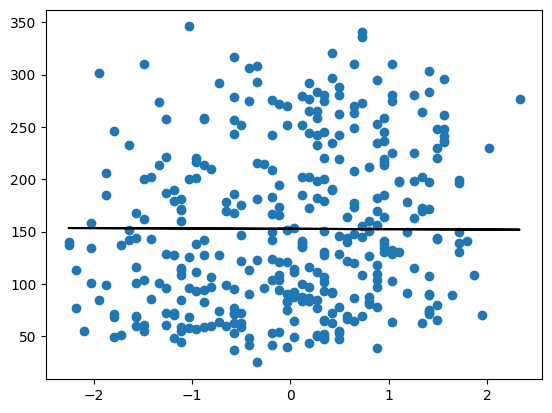

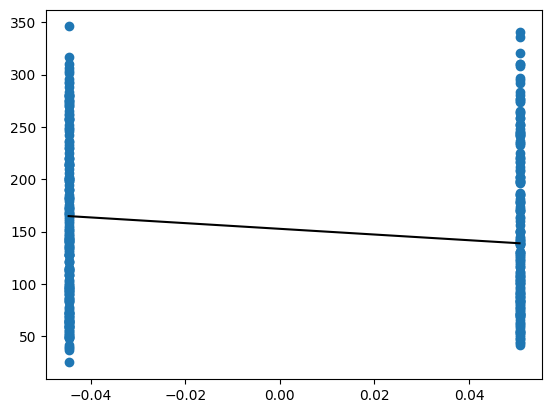

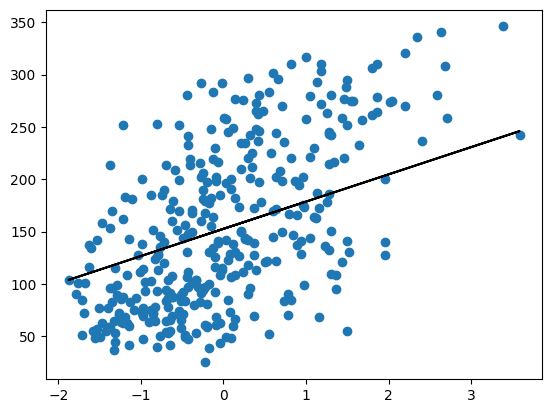

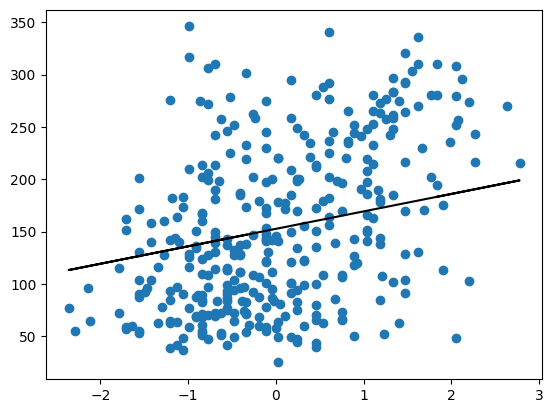

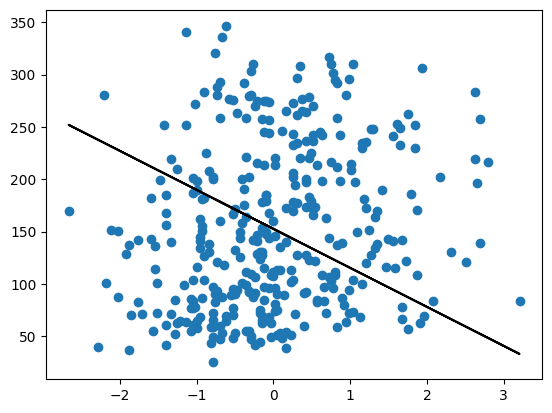

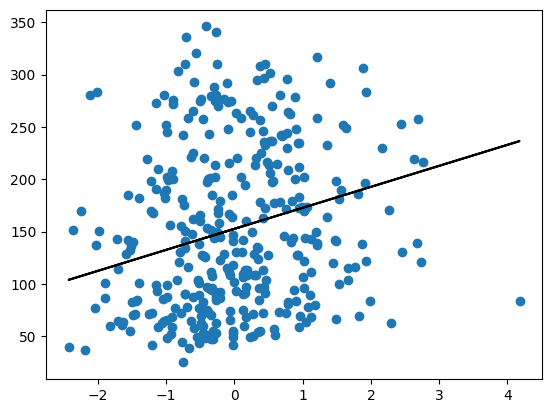

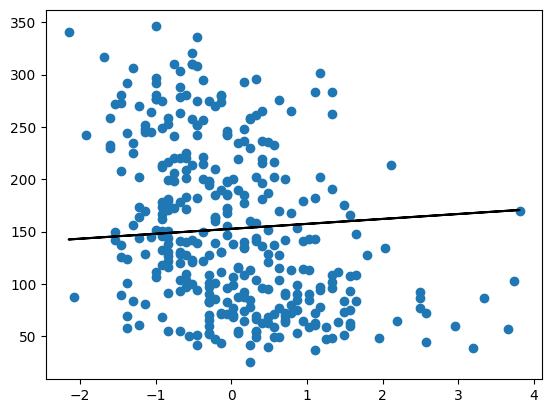

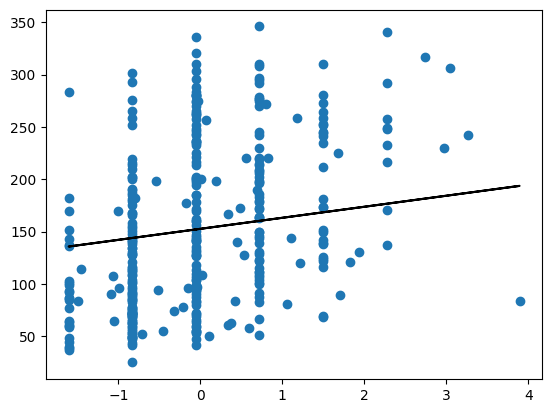

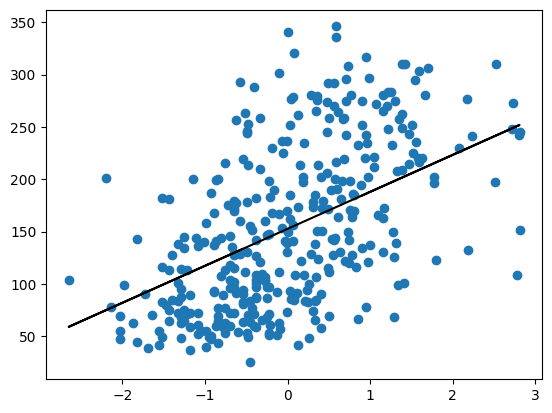

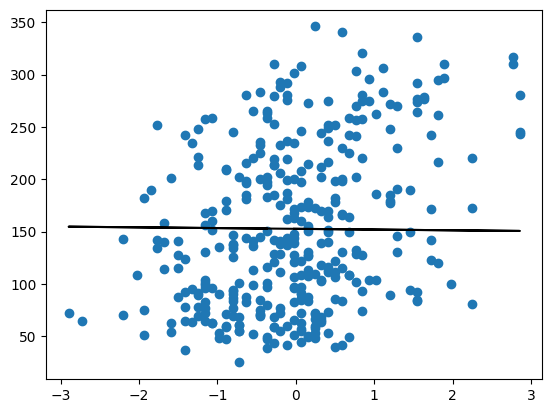

In [18]:
for i in range(1,parameters+1):
    plt.figure()
    plt.scatter(train_x[:,i], train_y, label=f'Feature {i}')

    prediction = theta[0] + theta[i]*train_x[:,i]
    plt.plot(train_x[:,i], prediction, color="black", label=f'Line for theta[{i+1}]')

## Testing

In [19]:
test_predictions = test_x @ theta

In [20]:
MSE = (1/l_test)*(np.sum(np.square(test_y-test_predictions)))
MSE

np.float64(3015.2038736671316)

In [21]:
MAE = (1/l_test)*(np.sum(np.abs(test_y-test_predictions)))
MAE

np.float64(43.69842787248314)

In [22]:
y_mean = np.mean(test_y)
ss_total = np.sum((test_y-y_mean)**2)
ss_residual = np.sum((test_y-test_predictions)**2)
R2 = 1-(ss_residual/ss_total)
R2

np.float64(0.4630032254005504)

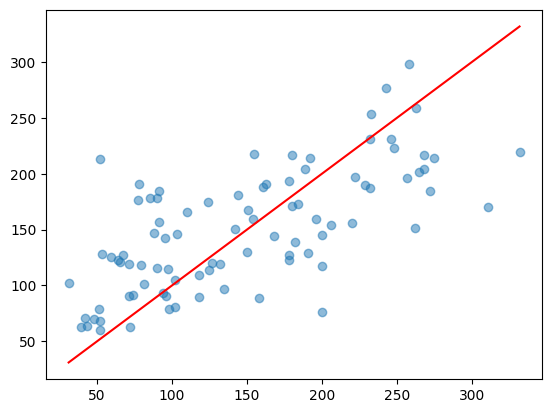

In [23]:
plt.scatter(test_y, test_predictions, alpha=0.5)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color="red")